**i. Implementation of Decision Tree Algorithm Using M L Fundamentals**

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



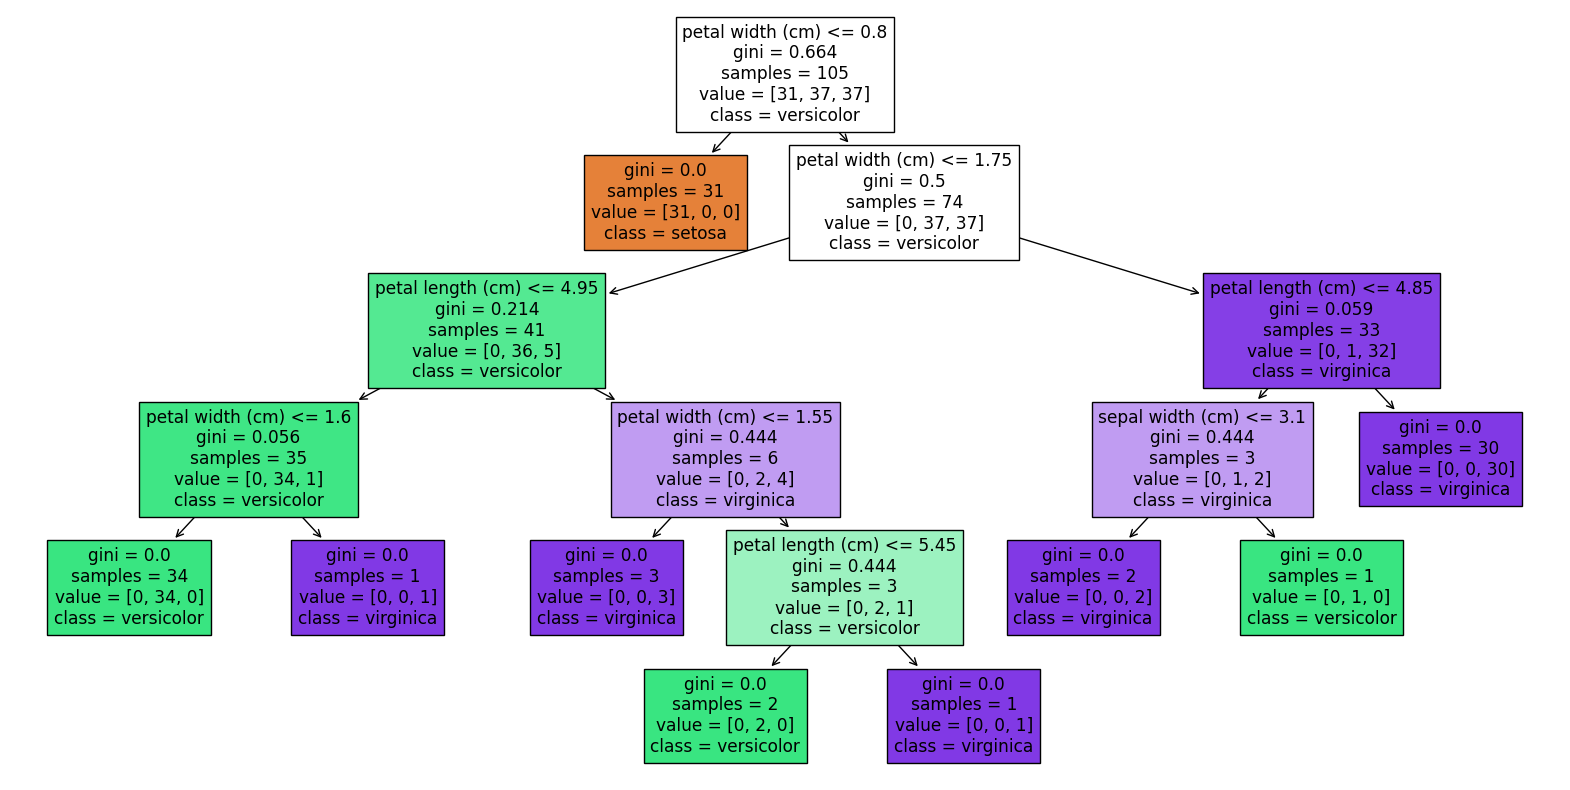

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Prepare the data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


**Back Propagation Algorithm Using M L Fundamentals**

In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training data for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Seed the random number generator for reproducibility
np.random.seed(42)

# Initialize weights and biases
input_layer_neurons = 2
hidden_layer_neurons = 2
output_layer_neurons = 1

hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_bias = np.random.uniform(size=(1, output_layer_neurons))

# Set the learning rate and number of epochs
learning_rate = 0.1
epochs = 10000

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(X, hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    # Calculate error
    error = y - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        loss = np.mean(np.abs(error))
        print(f'Epoch {epoch}, Loss: {loss}')

# Print final predicted output
print('Final predicted output:')
print(predicted_output)


Epoch 0, Loss: 0.4977550305860017
Epoch 1000, Loss: 0.48962844155619734
Epoch 2000, Loss: 0.430505591830237
Epoch 3000, Loss: 0.335726373976126
Epoch 4000, Loss: 0.17357496319517723
Epoch 5000, Loss: 0.11181272498560173
Epoch 6000, Loss: 0.08576413241547484
Epoch 7000, Loss: 0.07130866479694536
Epoch 8000, Loss: 0.061975191385776986
Epoch 9000, Loss: 0.05537218409879135
Final predicted output:
[[0.05322146]
 [0.95171535]
 [0.95160449]
 [0.05175396]]
